Dataset = https://www.kaggle.com/datasets/prokshitha/home-value-insights?resource=download

Tujuan : Memberikan informasi tentang hubungan antara variabel bebas (luas rumah, jumlah kamar, dan sebagainya) dengan harga rumah serta menentukan harga rumah berdasarkan variabel bebasnya.

User : Pembeli rumah yang sedang mencari tempat tinggal yang sesuai dengan pribadinya, penjual rumah untuk menjual dengan harga yang sesuai pasar, agen real estat untuk merekomendasikan kepada klien, peneliti untuk memahami tren dan menganalisis

Fungsi : Untuk melihat hubungan antara variabel bebas dengan variabel terikatnya, melihat hubungan antarvariabel serta memprediksi berdasarkan data yang digunakan

Tone : informatif dan profesional, user friendly, engaging dengan memberikan visual yang jelas dan memiliki tingkat akurasi yang tinggi sehingga pengguna dapat mengeksplorasi data.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv('/content/house_price_regression_dataset.csv', na_values = ['#NAMES?'])
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [3]:
df. isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


                            OLS Regression Results                            
Dep. Variable:            House_Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.543e+04
Date:                Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                        07:56:15   Log-Likelihood:                -10605.
No. Observations:                1000   AIC:                         2.123e+04
Df Residuals:                     992   BIC:                         2.127e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -2.007e+06 

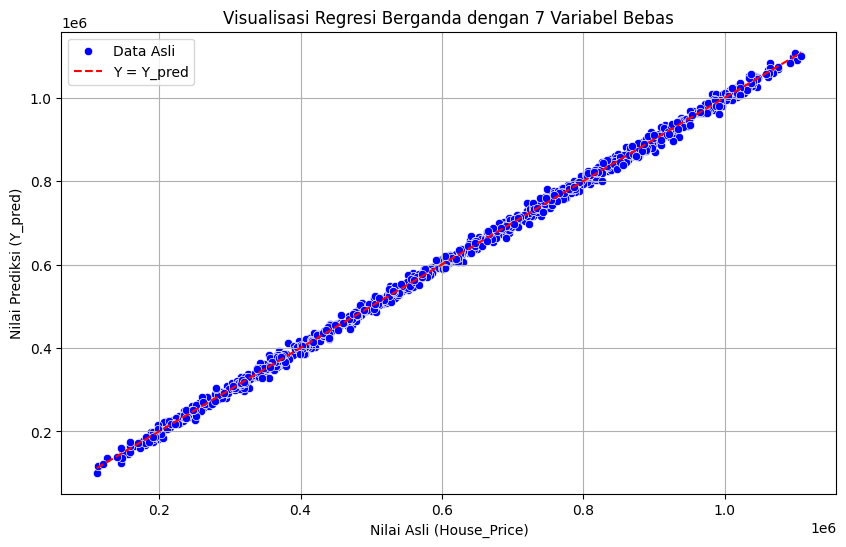

In [11]:
X = df[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality']]
Y = df['House_Price']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

df['Y_pred'] = model.predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='House_Price', y='Y_pred', data=df, color='blue', label='Data Asli')
plt.plot([df['House_Price'].min(), df['House_Price'].max()],
         [df['House_Price'].min(), df['House_Price'].max()],
         color='red', linestyle='--', label='Y = Y_pred')
plt.title('Visualisasi Regresi Berganda dengan 7 Variabel Bebas')
plt.xlabel('Nilai Asli (House_Price)')
plt.ylabel('Nilai Prediksi (Y_pred)')
plt.legend()
plt.grid()
plt.show()

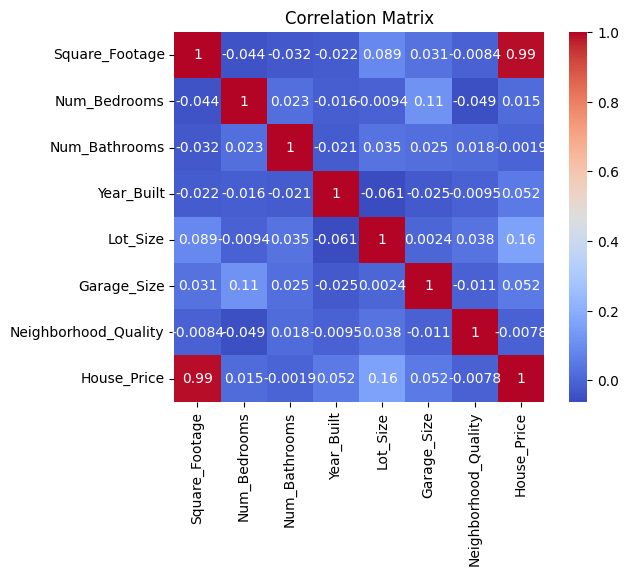

In [4]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()